### Prepared by: Anas Muhammad Ashraf

# INTRODUCTION

One of the most common problems at work is turnover. Replacing a worker earning about
50,000 dollars cost the company about 10,000 dollars or 20% of that worker’s yearly
income according to the Center of American Progress. Replacing a high-level employee can cost multiple of that.

Costs include:
- Cost of off-boarding
- Cost of hiring (advertising, interviewing, hiring)
- Cost of onboarding a new person (training, management time)
- Lost productivity (a new person may take 1-2 years to reach the productivity of an existing person)

As a data analyst, my job was to build a machine learning model to help the HR department create better decision making. 

Based on the data, the following objectives were developed: 

- Identify what factors contributed to employee turnover the most.
- Perform Cluster Analysis to find any meaningful pattern.
- Build a model that predicts the likelihood if a certain employee will leave the company or not.
- Create different retention strategies on targeted employees.

To complete the first objective, Exploratory Data Analysis was performed in order to identify the factors that contributed to employee turnover the most. You'll find EDA in the 'Solving for Employee Churn - EDA' file.

## Import Libraries

In [1]:
import pandas as pd  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn import metrics

## Import Dataset

In [2]:
data = pd.read_csv('HR-data.csv')

In [3]:
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Identify Any Null/Missing Values

In [5]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

The data is clean and has no null or missing values. Therefore, the data is ready for preparing the Machine Learning Models.

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Descriptive Statistics was conducted for each feature. The following insights were found from the data.

 - On average, the satisfaction level of employees is 61.28%, which is slightly lower than the overall average job satisfaction level in US, i.e. 65%. 
 - The average monthly hours for an employee is 201 hours.
 - Each employee receives atleast 2 projects during his employement in the company.
 - Work accident rate for the company was 14.46%. The company has to take relevant measures and procedures in order to reduce work accident rate and improve the retention ratio. 

# K-MEANS ANALYSIS

To conduct K-means Clustering and Analysis, the data was split into two subsets; employees that left and employees that didnt leave. For K-means, we will be using the 'left' data to gain proper and more accurate insights. 

In [7]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
from sklearn.cluster import KMeans
##Filtering out data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
left_emp

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


<AxesSubplot:xlabel='satisfaction_level', ylabel='last_evaluation'>

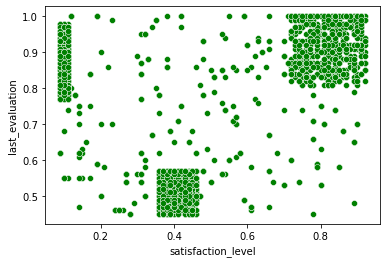

In [9]:
sns.scatterplot(data = left_emp, x="satisfaction_level", y="last_evaluation", c = ["green"])

To determine the number of clusters ideal for our analysis we will use the Elbow Method. It is the most popular method for determining the optimal number of clusters. The method is based on calculating the Within-Cluster-Sum of Squared Errors (WSS) for different number of clusters (k) and selecting the k for which change in WSS first starts to diminish.

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(left_emp)
    distortions.append(kmeanModel.inertia_)

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

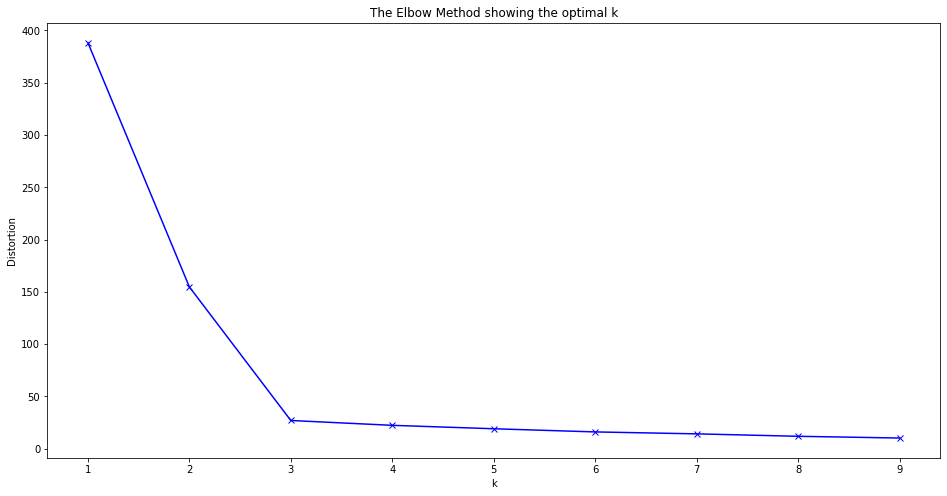

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The line graph shows that the WSS first starts to diminish at k=3, therfore, the ideal number of clusters for our analysis will be 3. 

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


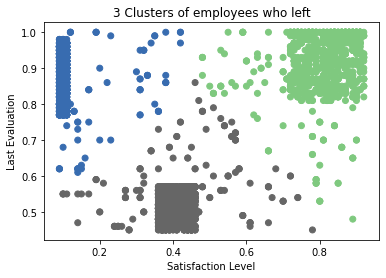

In [12]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)
left_emp['label'] = kmeans.labels_

plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

The three clusters are shown in the plot above.

- Green Cluster (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were “ideal”. They loved their work and were evaluated highly for their performance. However, these employees might have left the job as they found a better opportunity with a higher salary or promotion.

- Blue Cluster (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work. These employees either left their job or were made redundant.

- Grey Cluster (Hard-working, Sad and Frustrated Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. These are the employees who performed really well but left their jobs due to poor working environment

We also conducted Cluster Analysis on the employees who are still working at the company to identify which should we know to focus on.

In [13]:
present_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 0]

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


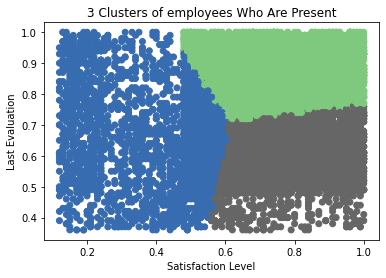

In [14]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(present_emp)
# Add new column "label" annd assign cluster labels.
present_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(present_emp['satisfaction_level'], present_emp['last_evaluation'], c=present_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees Who Are Present')
plt.show()

The three clusters are shown in the plot above.

- Green Cluster (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were “ideal”. They loved their work and were evaluated highly for their performance.

- Blue Cluster (Hard-working, Sad and Frustrated Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75.  These are the employees that are important to the company and performing really well, but they are not satisfied with the company’s environment and culture. We have to focus on this cluster as these employees are our main target of focus.

- Grey Cluster (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

# BUILDING MACHINE LEARNING MODELS

## Preparing The Data

For Predictive Analysis, three machine learning models are prepared for the data. Since, the response variable is categorical, we have used classification models for analysis. The following models have been used;
 - Logistic Regression
 - Decision Tree
 - Gaussion Naive Bayes
 
To begin with the model building, we have converted two features (salary & sales) having string values into integer values using **preprocessing algorithm**. The data was then split into features and target variables. X represent features variable and Y represents target/outcome variable. 

Next, the data was split into train data and test data with a ratio of 70:30. Train data will be used for model building, estimation and selection, whereas the test data will be used for model evaluation. The steps are shown in the script below.

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['salary']=le.fit_transform(data['salary'])
data['Departments']=le.fit_transform(data['sales'])

In [16]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Departments
0,0.38,0.53,2,157,3,0,1,0,sales,1,7
1,0.80,0.86,5,262,6,0,1,0,sales,2,7
2,0.11,0.88,7,272,4,0,1,0,sales,2,7
3,0.72,0.87,5,223,5,0,1,0,sales,1,7
4,0.37,0.52,2,159,3,0,1,0,sales,1,7


In [17]:
#Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments', 'salary']]
y=data['left']

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

## Logistic Regression Model

After preparing the data, the first model we have developed is 'Logistic Regression Model'. Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature, which in this case is whether the employee leaves or does not leave.

The Logistic Model was first fit into the train data set. After training the model, there were two types of predictions made using the test data set;
 - Soft Prediction
 - Hard Prediction. 
 
The results of the soft prediction predicts the probability score of each employee leaving the company. In other words, what is the probability of each employee to leave the company. On the other hand, hard predicition predicts which of the employee will leave. 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logistic_model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)
logistic_model = logistic_model.fit(X_train, y_train)

In [22]:
# Hard Predicition
logistic_model.predict(X_test)[:15]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [23]:
# Make class probability predictions
#Soft Prediction
logistic_model.predict_proba(X_test)[:15]

array([[0.9255222 , 0.0744778 ],
       [0.88165107, 0.11834893],
       [0.60335722, 0.39664278],
       [0.32571085, 0.67428915],
       [0.97663084, 0.02336916],
       [0.52859665, 0.47140335],
       [0.97345904, 0.02654096],
       [0.06406012, 0.93593988],
       [0.36264801, 0.63735199],
       [0.14053771, 0.85946229],
       [0.57267761, 0.42732239],
       [0.936284  , 0.063716  ],
       [0.12742414, 0.87257586],
       [0.54219664, 0.45780336],
       [0.43528688, 0.56471312]])

In [24]:
pred_log = logistic_model.predict(X_test)
print(pred_log)
pred_prob_log = logistic_model.predict_proba(X_test)[:,1]
print(pred_prob_log)

[0 0 0 ... 0 0 0]
[0.0744778  0.11834893 0.39664278 ... 0.21888479 0.06722971 0.09324096]


<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

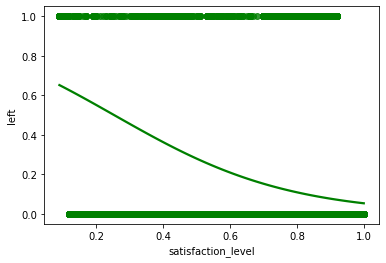

In [25]:
sns.regplot(x='satisfaction_level', y='left', data=data, logistic=True, color='g', ci = None)

The plot above shows the relationship between the feature **satisfaction level** and target variable **left**. The feature satisfaction level was selected as it has the highest level of importance in the model as determined using **Extra Tree Classifier**. The curve in the plot shows an inverse relationship i.e. the higher the satisfaction level the lower the chances the employee leaves. Thus, it clearly states that the company should undertake relevant procedures to improve the satisfaction level among the employees in order to improve its retention ratio. 

## Model Evaluation

For the evaluation of the logistic model, we have used hard predictions.

Firstly, we used the Confusion Matrix for the evaluation of the model. Here, you can see the 
confusion matrix in the form of the array object. The dimension of this matrix is 2x2 because 
this model is a binary classification. You have two classes 0 and 1. Diagonal values represent 
accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 
2543 and 854 are actual predictions, and 218 and 885 are incorrect predictions.

Next, we used Accuracy, Precision, and Recall scores for model accuracy. Based on the 
results, the accuracy score is 75.49%, the precision score is 49.11% and the recall score is 
79.66%. Cross-validation evaluation gives an accuracy score of 0.752 with a standard 
deviation of 0.009 to the Logistic Regression model.

Moreover, using the Classification Report, the precision score is 0.49 which means that out of 
all the employees the model predicted would leave, only 49% of them actually left. The recall 
score, on the other hand, states that out of all the employees that actually left, the model 
predicted 80% of the employees will leave. Overall the F1 score of the model, which is the 
weighted harmonic mean of precision and recall, is 0.61.

Meanwhile, the AUC score for the logistic model is 0.819, which means 81.9% of the area is 
covered under the AUC-ROC curve as displayed in the plot below. An 81.9% AUC score 
states that the model has accurately predicted almost 82% of the observations and thus the 
model is fit for use for predictions. 

In [26]:
log_pred_test = logistic_model.predict(X_test)
print(log_pred_test)

[0 0 0 ... 0 0 0]


In [27]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, log_pred_test))

[[2538  890]
 [ 220  852]]


In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, log_pred_test))
# Model Precision
print("Precision:",metrics.precision_score(y_test, log_pred_test))
# Model Recall
print("Recall:",metrics.recall_score(y_test, log_pred_test))

Accuracy: 0.7533333333333333
Precision: 0.4890929965556831
Recall: 0.7947761194029851


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
cv = KFold(n_splits=10, random_state=1, shuffle=True)
log_scores = cross_val_score(logistic_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(log_scores), std(log_scores)))

Accuracy: 0.752 (0.008)


In [30]:
print (metrics.classification_report(y_test, log_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      3428
           1       0.49      0.79      0.61      1072

    accuracy                           0.75      4500
   macro avg       0.70      0.77      0.71      4500
weighted avg       0.82      0.75      0.77      4500



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.818


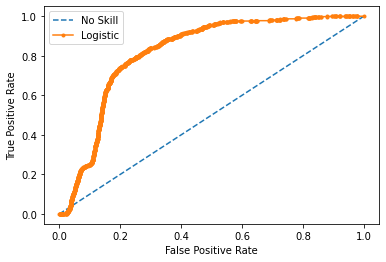

In [31]:
## AUC-ROC Curve ##
ns_probs = [0 for _ in range(len(y_test))]
pred_prob_log_test = logistic_model.predict_proba(X_test)[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
log_auc = roc_auc_score(y_test, pred_prob_log_test)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (log_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
log_fpr, log_tpr, _ = roc_curve(y_test, pred_prob_log_test)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(log_fpr, log_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Random Forest Regression Model

Next we have built a Random Forest model to predict whether employees will leave or stay in the company. Random forests is a supervised learning algorithm. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. 

To begin with the model, we first built the model by fitting it into the train data set. Then, the trained model was fit into the test data set to predict the outcome of the model. The variable **rf_y_pred** shows the predicted outcomes of the model. 

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
rf_y_pred = clf.predict(X_test)
print(rf_y_pred)

[0 0 0 ... 0 0 0]


## Model Evaluation 

For evaluation of the Random Forest Model, we have used the following reports and metrices.

Firstly, we used Confusion Matrix for evaluation of the model. The dimension of this matrix is 2x2 because this model is binary classification. You have two classes 0 and 1. In the output, 3418 and 1028 are actual predictions, and 44 and 10 are incorrect predictions.

Next, we have used Accuracy, Precision and Recall scores for model accuracy. Based on the results, the accuracy score is 0.988, precision score is 0.99 and recall score is 0.9589. Cross validation evaluation gives an accuracy score of 0.993 with a standard deviation of 0.002 to the Random Forest model. The model was able to predict 99.3% of the outcomes accurately.

Moreover, using the Classification Report, precision score is 0.99 which means that out of all the employees the model predicted would leave, only 99% of them actually left. The recall score, on the other hand, states that out of all the employees that actually left, the model predicted 0.96% of the employees will leave. Overall the F1 score of the model, which is the weighted harmonic mean of precision and recall, is 0.97. Since, its too close to 1, the model has accurately predicted the outcomes of the data and is reliable to use for predictions. 

Moreover, the AUC score for the decision tree model is 0.99, which means 99% of the area is covered under the AUC-ROC curve as displayed in the plot below. An 99% AUC score states that the model has accuratly predicted almost 99% of the observations and thus the model is fit for use for predictions.

In [35]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, rf_y_pred))

[[3420    8]
 [  46 1026]]


In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, rf_y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, rf_y_pred))

Accuracy: 0.988
Precision: 0.9922630560928434
Recall: 0.957089552238806


In [37]:
# Cross Validation Score
rf_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(rf_scores), std(rf_scores)))

Accuracy: 0.993 (0.002)


In [38]:
## Classification Report
print (metrics.classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.990


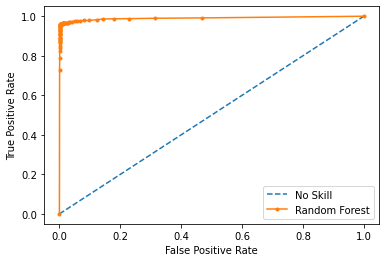

In [39]:
## AUC-ROC Curve ##
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = clf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Gaussian Naive Bayes Classifier Model

Next we have built a Naive Bayes model to predict whether employees will leave or stay in the company. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object. Among the different types of Naive Bayes models, we have used the Gaussian Naive Bayes model. The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.

To begin with the model, we first built the model by fitting it into the train data set. Then, the trained model was fit into the test data set to predict the outcome of the model. The variable 'pred_GNB' shows the predicted outcomes of the model.

In [40]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [41]:
#Create a Gaussian Classifier
GaussianNB = GaussianNB()

In [42]:
# Train the model using the training sets
GaussianNB.fit(X_train, y_train)

GaussianNB()

In [43]:
#Predict Output
pred_GNB= GaussianNB.predict(X_test) # 0:Overcast, 2:Mild
print(pred_GNB)

[0 0 0 ... 0 0 0]


## Model Evaluation

For evaluation of the Naive Bayes Model, we have used the following reports and metrices.

Firstly, we used Confusion Matrix for evaluation of the model. The dimension of this matrix is 2x2 because this model is binary classification. You have two classes 0 and 1. In the output, 2831 and 765 are actual predictions, and 597 and 307 are incorrect predictions.

Next, we have used Accuracy, Precision and Recall scores for model accuracy. Based on the results, the accuracy score is 0.799, precision score is 0.56 and recall score is 0.713. Cross validation evaluation gives an accuracy score of 0.796 with a standard deviation of 0.012 to the Gaussian Naive Bayes model. The model was able to predict 79.6% of the outcomes accurately.

Moreover, using the Classification Report, precision score is 0.56 which means that out of all the employees the model predicted would leave, only 56% of them actually left. The recall score, on the other hand, states that out of all the employees that actually left, the model predicted 71% of the employees will leave. Overall the F1 score of the model, which is the weighted harmonic mean of precision and recall, is 0.63.

Moreover, the AUC score for the decision tree model is 0.845, which means 84.5% of the area is covered under the AUC-ROC curve as displayed in the plot below. An 84.5% AUC score states that the model has accuratly predicted almost 0.845% of the observations and thus the model is fit for use for predictions.

In [44]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, pred_GNB))

[[2831  597]
 [ 307  765]]


In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_GNB))
# Model Precision
print("Precision:",metrics.precision_score(y_test, pred_GNB))
# Model Recall
print("Recall:",metrics.recall_score(y_test, pred_GNB))

Accuracy: 0.7991111111111111
Precision: 0.5616740088105727
Recall: 0.7136194029850746


In [46]:
# Cross Validation Score
GNB_scores = cross_val_score(GaussianNB, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(GNB_scores), std(GNB_scores)))

Accuracy: 0.796 (0.012)


In [47]:
# Classification Report
print (metrics.classification_report(y_test, pred_GNB))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      3428
           1       0.56      0.71      0.63      1072

    accuracy                           0.80      4500
   macro avg       0.73      0.77      0.75      4500
weighted avg       0.82      0.80      0.81      4500



No Skill: ROC AUC=0.500
Gaussian Naive Bayes: ROC AUC=0.845


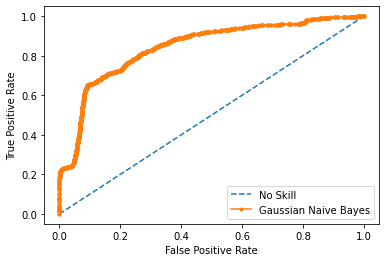

In [48]:
## AUC-ROC Curve ##
ns_probs = [0 for _ in range(len(y_test))]
gnb_probs = GaussianNB.predict_proba(X_test)
gnb_probs = gnb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gaussian Naive Bayes: ROC AUC=%.3f' % (gnb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# LEARNING CURVES

## Logistic Regression 

In [49]:
from sklearn.model_selection import learning_curve

In [50]:
train_size, train_score, test_score = learning_curve(estimator=logistic_model, X=X, y=y, cv=cv, 
                                                     scoring="neg_root_mean_squared_error")

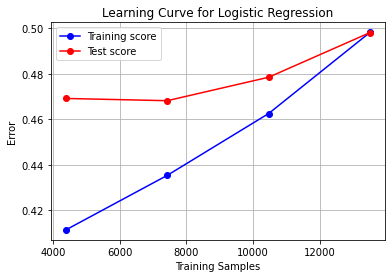

In [51]:
train_score_m = -train_score.mean(axis=1)
test_score_m = -test_score.mean(axis=1)

plt.plot(train_size, train_score_m, 'o-', color="b")
plt.plot(train_size, test_score_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("Error")
plt.title("Learning Curve for Logistic Regression")
plt.grid()

plt.show()

## Random Forest

In [52]:
train_size, train_score, test_score = learning_curve(estimator=clf, X=X, y=y, cv=cv, scoring="neg_root_mean_squared_error")

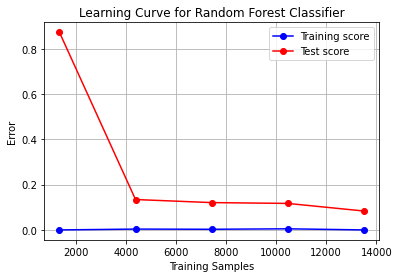

In [53]:
train_score_m = -train_score.mean(axis=1)
test_score_m = -test_score.mean(axis=1)

plt.plot(train_size, train_score_m, 'o-', color="b")
plt.plot(train_size, test_score_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("Error")
plt.title("Learning Curve for Random Forest Classifier")
plt.grid()

plt.show()

## Gaussian Naive Bayes 

In [54]:
train_size, train_score, test_score = learning_curve(estimator=GaussianNB, X=X, y=y, cv=10, scoring="neg_root_mean_squared_error")

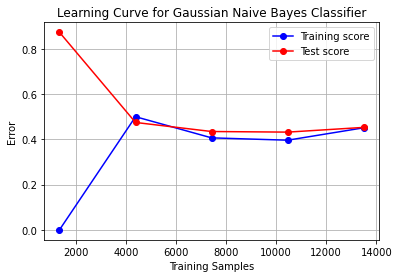

In [55]:
train_score_m = -train_score.mean(axis=1)
test_score_m = -test_score.mean(axis=1)

plt.plot(train_size, train_score_m, 'o-', color="b")
plt.plot(train_size, test_score_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("Error")
plt.title("Learning Curve for Gaussian Naive Bayes Classifier")
plt.grid()
plt.show()

## Analysis of Learning Curves of the Models

With respect to the learning curve built for the logistic regression model, as the instances increase, the error for training and test sets increases. This indicates that adding more examples to the model will not improve the model, rather the chances for error increases. 

On the other hand, in the random forest model, bias is added to the model by creating several diverse models and combining their predictions. Even though, the training error is constant at almost to 0 despite the increase in training samples, the huge gape between test and training score narrows down as test score approaches 0 with the increase in samples. 

For the Gaussian Naive Bayes model, it can be observed that the error is reduced in the validation data. However, it came at the cost of the training data, as we can observe the error increases. Moreover, both the curves are stable beyond 4000 samples which implies that adding more instances may not improve this model much further.

# FINAL MODEL 

## Comparison Between the Different Models

Comparing the three machine learning models, the precision and recall score Random Forest is the highest where the precision score is 0.99, whereas the recall score is 0.96. This is it does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases. Moreover, the learning curve indicates a more accurate curve with errors reduced to approximately zero. Since, random forest provides with a better predictive performance we have chosen Random Forest Model as our final model.

## Final Model

To optimize the model and improve the F1 score of the classification report, the model's training and test split ration was increased to 80:20. This is necessary as to improve the precision and recall scores of the model, as precision model indicates the percentage of results that were actuall true from the predicted results, whereas recall score indictates the percentage of results that were predicted correctly from the actual results. This would further improve the F1 score of the model making it a more accurate machine learning model. 

By changing the ration to 80:20, eventhough, precision score remains the same, recall scores improves and the F1 score improves to 0.98 thus making the model predict more accurate results.

In [56]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
rf_y_pred = clf.predict(X_test)
rf_y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [60]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, rf_y_pred))

[[2287    7]
 [  26  680]]


In [61]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, rf_y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, rf_y_pred))

Accuracy: 0.989
Precision: 0.9898107714701602
Recall: 0.9631728045325779


In [62]:
# Cross Validation Score
rf_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(rf_scores), std(rf_scores)))

Accuracy: 0.993 (0.002)


In [63]:
## Classification Report
print (metrics.classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.991


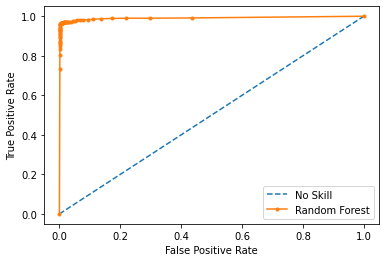

In [64]:
## AUC-ROC Curve ##
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = clf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Precision - Recall Curve -  Random Forest

The precision-recall curve of the final model gives us a shape where at thresholds with low recall, the precision is correspondingly high, and at very high recall, the precision begins to drop. 

In [65]:
from sklearn.metrics import precision_recall_curve

In [66]:
rf_probs = clf.predict_proba(X_test)[:, 1]
rf_probs

array([0.  , 0.  , 0.  , ..., 0.02, 0.18, 0.89])

In [67]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, rf_probs)

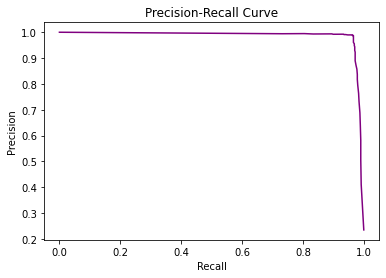

In [68]:
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

# Top 10 Features That Were Most Significant - Ranking

## Extra Trees Classifier

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. To determine the top features based on their importance  to the model, we have used Extra Tree Classifier algorithm. Extra Tree Classifier gives a score for each feature depending on their importance to the data or the model. The higher the score, the higher the importance.



[0.25528585 0.13490656 0.24713497 0.13183946 0.17556186 0.0161947
 0.00240556 0.02044164 0.0162294 ]


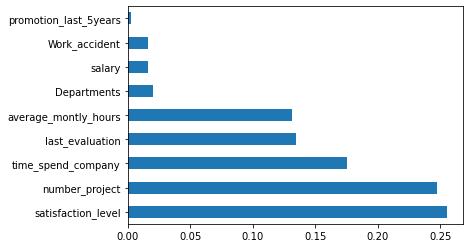

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
ETC_model = ExtraTreesClassifier()
ETC_model.fit(X,y)
print(ETC_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(ETC_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The bar plot above shows the importance of each feature to the model. The feature 'satisfaction_level' is the most important feature with a score of approximately more than 0.25, whereas the feature 'promotion_last_5years' is the feature with the least importance.

# DECISION BOUNDARY

The Decision Boundary plotted has separated the data-points into regions, which are actually 
the classes in which they belong.
After training a Machine Learning Model using a data-set, it is necessary to visualize the 
classification of the data-points in Feature Space.

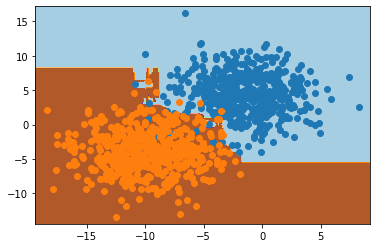

In [70]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

model = clf

model.fit(X, y)

yhat = model.predict(grid)

zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')

for class_value in range(2):
    
    row_ix = np.where(y == class_value)
    
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

# RETENTION STRATEGY ACROSS THE ORGANIZATION

In order to devise a retention strategy to improve the retention rates of the employees for the 
organization, we will firstly form clusters by comparing satisfaction vs evaluation through KMeans. For us to form clusters using K-Means, firstly the optimum number of clusters would 
be calculated using the elbow method to reveal the optimal k. the optimal number of clusters 
are found to be 3.

Now after applying K-Means, three clusters were formed for those who left the company:

- Green Cluster: Hard-working and Happy

- Blue Cluster: Bad and Sad Employee

- Grey Cluster: Hard-working, Sad and Frustrated Employee 

The Blue Cluster had Satisfaction level below 0.2 and evaluations were greater than 0.75, which could be a good indication that employees who left the company were good workers but felt horrible at their job.

What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are “overworked”?

The Grey Cluster had Satisfaction level between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

Question: Could this cluster mean employees who “under-performed”? 

The Green Cluster had Satisfaction level between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were “ideal”. They loved their work and were evaluated highly for their performance.

Question: Could this cluster mean that employees left because they found another job 
opportunity?

The similar was done for those who were currently in the company in order to retain them:

Here also Blue cluster represents those who have low satisfaction yet high evaluation, Grey 
represents those with optimal to high satisfaction yet low evaluation and Green represents 
those with high evaluation and optimal to high satisfaction.

Using the reference from our EDA distribution blot (satisfaction – evaluation – average 
monthly hours) :

- Satisfaction - There is a huge spike for employees with low satisfaction and high satisfaction.
- Evaluation - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) 
and high evaluations (more than 0.8)
- AverageMonthlyHours - There is another bimodal distribution of employees with lower and 
higher average monthly hours (less than 150 hours & more than 250 hours) 

The evaluation and average monthly hour graphs both share a similar distribution. Employees 
with lower average monthly hours were evaluated less and vice versa. If you look back at the 
correlation matrix, the high correlation between evaluation and average Monthly Hours does 
support this finding. So you had a high evaluation if you had high average monthly hours.


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

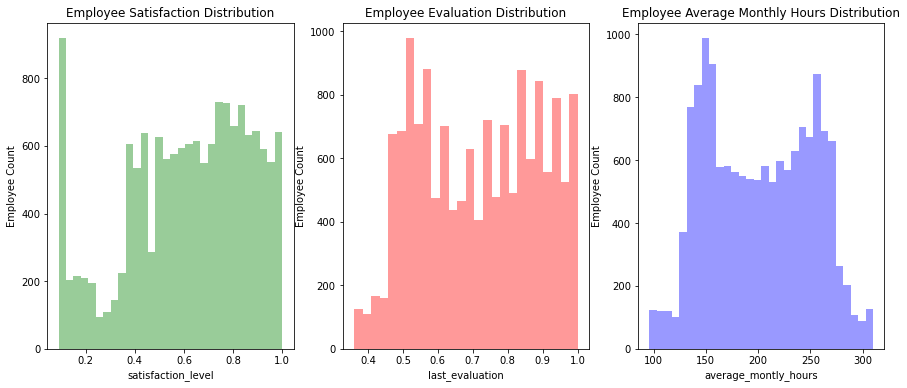

In [71]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(data.satisfaction_level, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(data.last_evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(data.average_montly_hours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

Furthermore, if we look at the box plot for project count vs average monthly hours, we notice 
that employees who did not have a turnover had consistent averageMonthlyHours, despite the 
increase in projects .In contrast, employees who did have a turnover had an increase in 
averageMonthlyHours with the increase in projects. Looks like the average employees who 
stayed worked about 200hours/month. Those that had a turnover worked about 
250hours/month and 150hours/month. Thus 250hours/month meant over worked and 
150hours/month were under performed

**Project Count VS Average Monthly Hours**

<AxesSubplot:xlabel='number_project', ylabel='average_montly_hours'>

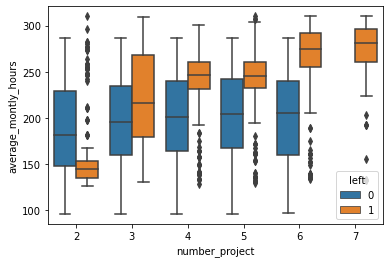

In [72]:
sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=data)

To understand the correlation , we turn towards our heat map:


<AxesSubplot:>

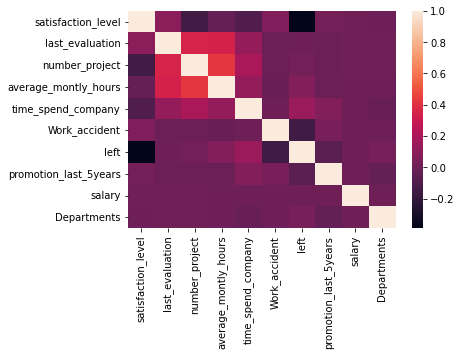

In [73]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Moderate Positively Correlated Features: 
- project Count vs evaluation: 0.349333
- project Count vs average Monthly Hours: 0.417211 
- average Monthly Hours vs evaluation: 0.339742 

Moderate Negatively Correlated Feature:
- satisfaction vs turnover(left): -0.388375

The project count vs evaluation box plotter showed us that:

Looks like employees who did not leave the company had an average evaluation of around 
70% even with different projectCounts . There is a huge skew in employees who had a 
turnover though. It drastically changes after 3 projectCounts. Employees that had two 
projects and a horrible evaluation left. Employees with more than 3 projects and super high 
evaluations left

<AxesSubplot:xlabel='number_project', ylabel='last_evaluation'>

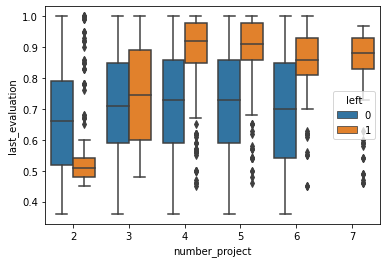

In [74]:
sns.boxplot(x="number_project", y="last_evaluation", hue="left", data=data)

While understanding project count and turn over:
More than half of the employees with 2,6, and 7 projects left the company Majority of the 
employees who did not leave the company had 3,4, and 5 projects All of the employees with 
7 projects left the company .There is an increase in employee turnover rate as project count 
increases.


[Text(0, 0.5, 'Percent')]

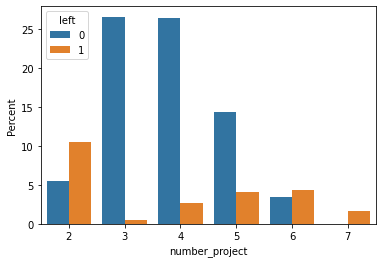

In [75]:
ax = sns.barplot(x="number_project", y="number_project", hue="left", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")

Moreover salary levels were a good determinant of predicting turnover with low and medium 
salary levels to leave the company:

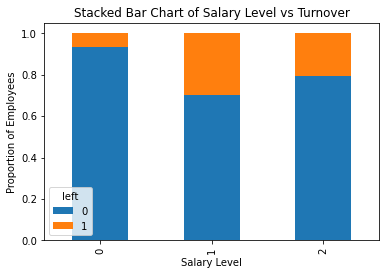

In [76]:
table=pd.crosstab(data.salary, data.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

The Blue Cluster has low satisfaction (below 0.2) and high evaluation (more than 0.8). We 
can say that they were evaluated more so they had more average monthly hours ie they fell in 
the category of working 250hours/month. As we know, employees who did have a turnover 
had an increase in averageMonthlyHours with the increase in projects, so there was an 
increase in projects for them too. This is further proved by the heat map which showed the 
positive correlation between project count and evaluation and project count and average 
monthly hours. Similarly, satisfaction and turn over had a moderately negative correlation 
which was proven here. Thus they had become frustrated and sad despite being hard working.

On average each employee works 201 hours a month The maximum monthly work hours in 
this dataset is 310 hours and this corresponds to 18 employees Interesting to note that all 
these 18 employees left the company: 9 had low salary and 9 had medium salary. None of 
them has had a promotion in the last 5 years. Their satisfaction level was very low, although 
their evaluation was very high (0.83); they were doing projects above average (6.2 projects) 
and their time spent at the company was on average 4 years. In order to retain them they 
should be offered an increase in salary which would affect their satisfaction level to an 
optimum level and cause them to stay back or commission can be offered as an alternative to 
retain them since they are already high performers thus they will be quicker in meeting 
commission targets. 

Moreover, since there is an increase in projects for them with increase in 
average working hours thus burn out levels should also be prevented by setting maximum 
hour boundary levels and vacations.

The Grey Cluster has low evaluation (below 0.58 approximately) and low to moderate 
satisfaction levels (between 0.35-0.45). It can be said that this cluster was underperforming 
and had less average monthly hours and these lied in the category if working 
150hours/month. Since we know the positive correlation between project count and 
evaluation, project count and average monthly hours and average monthly hours and 
evaluation so we know that this is the cluster with 2 project counts that left the company. 

Since they had underperformed thus they were badly evaluated which naturally led them to 
feel unsatisfied and thus leave the company. In order to retain them it is a must to make them 
feel valued, and make them feel that their work contributes value addition to the company 
and thus it will allow them to take ownership and improve satisfaction. To improve 
evaluation levels thus more projects should be designated to them but it must be kept mindful 
that they do not cause burn either so the optimal level of projects should be 3-5, and more 
projects will lead to better evaluation and the employees will also no longer feel that their 
work is of no importance or does not contribute to their professional growth.

The Green Cluster has high evaluation (>0.8) and high satisfaction levels (between 0.7 and 
1). It is evident that this cluster was ideal since not only the employees of this cluster were 
satisfied and loved their work but also were high performers for which they were highly 
evaluated. We can say that since they were highly evaluated so it means that not only they 
had an increase in average number of working hours but also average number of projects, this 
cluster must have had 6-7 projects. On average employees have been in the company for 3.5 
years 65% have been for 2 and 3 years Employee Profile of who stayed longer than 10 years.

There are 214 employees in this dataset that stayed longer than 10 years Their satisfaction 
level is a little above average - 0.65 Also their satisfaction level is a bit higher than average -
0.7, also the employees who were promoted in the last five years are less likely to leave than 
those who did not get a promotion in the last five years. In order to retain them, they must be 
acknowledged by promoting them otherwise they will join other companies that would be 
contributing to their professional growth as this set of employees is already aware of its 
capabilities

In [77]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Departments
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.347742,5.819041
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.345842,6.035284
